<h1> Deep Learning Small Project </h1>

In [1]:
%matplotlib inline

# Display
from IPython.display import Image

# Torch
import torch
from torch.utils.data import DataLoader
from torch import optim, nn
from torchvision import transforms

# Custom
import data
import model
import utils

Defining Model Parameters

In [2]:
N_EPOCH = 200
L_RATE_FL = 0.015482051772781362
BATCH_SIZE_FL = 16
DROPOUT_FL = 0.1258685286441622
WD_FL = 0.018373534139734887
L_RATE_SL = 0.00022040717935498526
BATCH_SIZE_SL = 64
DROPOUT_SL = 0.07216065625585566
WD_SL = 0.08267768486777832
PATIENCE = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

augmentations = transforms.Compose([
    transforms.CenterCrop((140,140)),
    transforms.RandomAffine(degrees = 0, translate = (0.05,0), scale=(1,1.1)),
    transforms.ToTensor()
])

Using Custom Dataloader, Data Split for First Layer classification task (normal vs infected)

In [3]:
fl_labels = {
0 : "Normal",
1 : "Infected"
}

fl_train = data.Lung_Dataset('train', verbose = 0, transform=augmentations)
fl_test = data.Lung_Dataset('val', verbose = 0)
fl_val = data.Lung_Dataset('test', verbose = 0)

"""
Data Split for Second Layer classification task (COVID vs Non-COVID) 
"""

sl_labels = {
0 : "COVID",
1 : "Non-COVID"
}

sl_train = data.Lung_Dataset('train', verbose = 2, transform=augmentations)
sl_test = data.Lung_Dataset('val', verbose = 2)
sl_val = data.Lung_Dataset('test', verbose = 2)

"""
Data Split for combined classification task (normal vs COVID vs Non-COVID) 
"""

combined_labels = {
0 : "Normal",
1 : "COVID",
2 : "Non-COVID"
}

final_val = data.Lung_Dataset('test', verbose = 1)
final_test = data.Lung_Dataset('val', verbose = 1)

Training the First Layer Model

Training the first model to classify normal and infected images


Epoch 1



Validation loss: 1.7389207298939044
Validation set accuracy:  62.113821138211385 %


Epoch 2



Validation loss: 1.8162820981099055
Validation set accuracy:  51.707317073170735 %


Epoch 3



Validation loss: 1.4231156332370563
Validation set accuracy:  64.8780487804878 %


Epoch 4



Validation loss: 1.0472385493608622
Validation set accuracy:  62.764227642276424 %


Epoch 5



Validation loss: 0.937310815621645
Validation set accuracy:  66.34146341463415 %


Epoch 6



Validation loss: 0.4871674393996214
Validation set accuracy:  84.71544715447155 %


Epoch 7



Validation loss: 2.4417277864920788
Validation set accuracy:  61.951219512195124 %


Epoch 8



Validation loss: 0.4237475370367368
Validation set accuracy:  83.08943089430895 %


Epoch 9



Validation loss: 0.8419198546654139
Validation set accuracy:  66.34146341463415 %


Epoch 10



Validation loss: 0.47631817559401196
Validation set accuracy:  82.27642276422765 %


Epoch 11



Validation loss: 0.34477602403897506
Validation set accuracy:  87.47967479674797 %


Epoch 12



Validation loss: 1.794768681892982
Validation set accuracy:  63.08943089430894 %


Epoch 13



Validation loss: 0.5039910162106539
Validation set accuracy:  79.67479674796748 %


Epoch 14



Validation loss: 0.9008105350419496
Validation set accuracy:  79.67479674796748 %


Epoch 15



Validation loss: 0.7614520098655843
Validation set accuracy:  74.3089430894309 %


Epoch 16



Validation loss: 1.1215840730911646
Validation set accuracy:  65.20325203252033 %


Epoch 17



Validation loss: 0.4711846892650311
Validation set accuracy:  86.82926829268293 %


Epoch 18



Validation loss: 0.9773037280791845
Validation set accuracy:  69.10569105691057 %


Epoch 19



Validation loss: 0.3248127141059973
Validation set accuracy:  85.52845528455285 %


Epoch 20



Validation loss: 0.44084053056744427
Validation set accuracy:  84.55284552845528 %


Epoch 21



Validation loss: 0.3412518387612624
Validation set accuracy:  85.85365853658537 %


Epoch 22



Validation loss: 0.3552429987451969
Validation set accuracy:  87.15447154471545 %


Epoch 23



Validation loss: 0.27272066273368323
Validation set accuracy:  88.9430894308943 %


Epoch 24



Validation loss: 0.696808826082792
Validation set accuracy:  80.65040650406505 %


Epoch 25



Validation loss: 1.1481695985182738
Validation set accuracy:  65.6910569105691 %


Epoch 26



Validation loss: 0.3514715030980416
Validation set accuracy:  87.47967479674797 %


Epoch 27



Validation loss: 0.6110012814020499
Validation set accuracy:  80.8130081300813 %


Epoch 28



Validation loss: 0.752906222278491
Validation set accuracy:  77.88617886178862 %


Epoch 29



Validation loss: 2.440074758651929
Validation set accuracy:  61.951219512195124 %


Epoch 30



Validation loss: 0.5765640452886239
Validation set accuracy:  70.5691056910569 %


Epoch 31



Validation loss: 0.49419086369184345
Validation set accuracy:  82.76422764227642 %


Epoch 32



Validation loss: 0.3440986540264044
Validation set accuracy:  89.26829268292683 %


Epoch 33



Validation loss: 0.6485376850916789
Validation set accuracy:  76.91056910569105 %



Test Accuracy of the first model:
Test set accuracy:  72.0 %


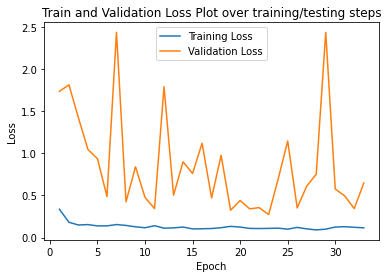

In [4]:
#First Model Training
fl_train_loader = DataLoader(fl_train, batch_size=BATCH_SIZE_FL, shuffle=True)
fl_val_loader = DataLoader(fl_val, batch_size=BATCH_SIZE_FL, shuffle=True)
fl_test_loader = DataLoader(fl_test, batch_size=BATCH_SIZE_FL, shuffle=True)
    
fl_model = model.CNN(dropout=DROPOUT_FL).to(device)
fl_optimizer = optim.AdamW(fl_model.parameters(), lr=L_RATE_FL, weight_decay = WD_FL)
    
print("Training the first model to classify normal and infected images")
model.train(fl_model, device, nn.BCELoss(), fl_optimizer, fl_train_loader, fl_val_loader, N_EPOCH, PATIENCE, "fl")

print("\n\n")
print("Test Accuracy of the first model:")
model.test(fl_model, device, fl_test_loader)

fl_model.to("cpu")
    
model.save_model(fl_model, fl_optimizer, './saved_models/fl_model_augmentations.pth')

Training the Second Layer Model




Training the second model to classify COVID and non-COVID images


Epoch 1



Validation loss: 0.5395061274369558
Validation set accuracy:  86.35170603674541 %


Epoch 2



Validation loss: 0.5287678241729736
Validation set accuracy:  72.96587926509186 %


Epoch 3



Validation loss: 0.38783209522565204
Validation set accuracy:  88.71391076115485 %


Epoch 4



Validation loss: 0.6489016562700272
Validation set accuracy:  75.59055118110236 %


Epoch 5



Validation loss: 0.41624192893505096
Validation set accuracy:  82.67716535433071 %


Epoch 6



Validation loss: 0.45580408970514935
Validation set accuracy:  82.1522309711286 %


Epoch 7



Validation loss: 0.427290012439092
Validation set accuracy:  81.62729658792651 %


Epoch 8



Validation loss: 0.4738473991552989
Validation set accuracy:  81.36482939632546 %


Epoch 9



Validation loss: 0.5712067683537801
Validation set accuracy:  79.5275590551181 %


Epoch 10



Validation loss: 0.4418636312087377
Validation set accuracy:  83.72703412073491 %


Epoch 11



Validation loss: 0.4234231462081273
Validation set accuracy:  85.30183727034121 %


Epoch 12



Validation loss: 0.3652107814947764
Validation set accuracy:  87.13910761154855 %


Epoch 13



Validation loss: 0.49212150275707245
Validation set accuracy:  73.49081364829397 %


Epoch 14



Validation loss: 0.4400184204181035
Validation set accuracy:  83.46456692913385 %


Epoch 15



Validation loss: 0.4421101560195287
Validation set accuracy:  86.08923884514435 %


Epoch 16



Validation loss: 0.5342855056126913
Validation set accuracy:  71.39107611548556 %


Epoch 17



Validation loss: 0.43982986609141034
Validation set accuracy:  78.74015748031496 %


Epoch 18



Validation loss: 0.33352650205294293
Validation set accuracy:  88.18897637795276 %


Epoch 19



Validation loss: 0.30957790712515515
Validation set accuracy:  90.55118110236221 %


Epoch 20



Validation loss: 0.4498504102230072
Validation set accuracy:  80.5774278215223 %


Epoch 21



Validation loss: 0.3244667947292328
Validation set accuracy:  93.7007874015748 %


Epoch 22



Validation loss: 0.38981033861637115
Validation set accuracy:  87.4015748031496 %


Epoch 23



Validation loss: 0.4117051462332408
Validation set accuracy:  88.4514435695538 %


Epoch 24



Validation loss: 0.42024704317251843
Validation set accuracy:  89.23884514435696 %


Epoch 25



Validation loss: 0.3739144653081894
Validation set accuracy:  86.8766404199475 %


Epoch 26



Validation loss: 0.46189109484354657
Validation set accuracy:  81.36482939632546 %


Epoch 27



Validation loss: 0.3688590278228124
Validation set accuracy:  92.91338582677166 %


Epoch 28



Validation loss: 0.5546348591645559
Validation set accuracy:  66.66666666666667 %


Epoch 29



Validation loss: 0.44132038950920105
Validation set accuracy:  85.56430446194226 %



Test Accuracy of the second model:
Test set accuracy:  70.58823529411765 %


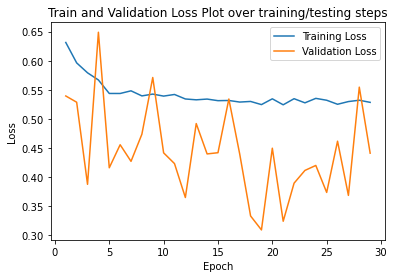

In [5]:
#Second Model Training
sl_train_loader = DataLoader(sl_train, batch_size=BATCH_SIZE_SL, shuffle=True)
sl_val_loader = DataLoader(sl_val, batch_size=BATCH_SIZE_SL, shuffle=True)
sl_test_loader = DataLoader(sl_test, batch_size=BATCH_SIZE_SL, shuffle=True)
    
sl_model = model.CNN(dropout=DROPOUT_SL).to(device)  
sl_optimizer = optim.Adam(sl_model.parameters(), lr=L_RATE_SL, weight_decay = WD_SL)
    
print("\n\n")
print("Training the second model to classify COVID and non-COVID images")
model.train(sl_model, device, nn.BCELoss(), sl_optimizer, sl_train_loader, sl_val_loader, N_EPOCH, PATIENCE, "sl")
    
print("\n\n")
print("Test Accuracy of the second model:")
model.test(sl_model, device, sl_test_loader)
    
sl_model.to("cpu")
    
model.save_model(sl_model, sl_optimizer, './saved_models/sl_model_augmentations.pth')

Analyzing the performance of each model (first layer and second layer models) 

Learning Curve of the First Layer Model

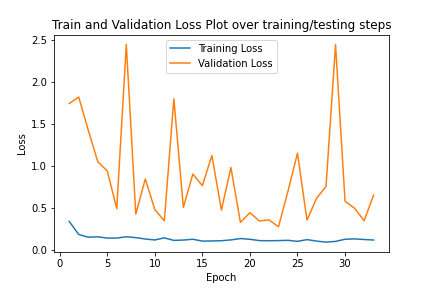

In [6]:
Image(filename='./saved_graphs/fl_learning_curve.png') 

Learning Curve of the Second Layer Model

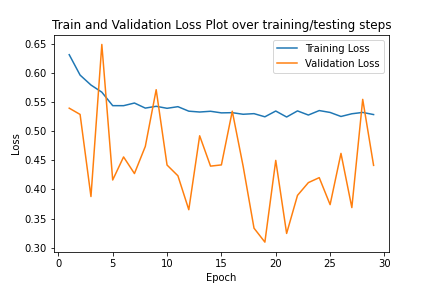

In [7]:
Image(filename='./saved_graphs/sl_learning_curve.png') 

Combine the 2 Models and Test the results on validation and test

Validation Results
Accuracy: 0.8390243649482727
Precision: [0.8807339449541285, 0.8235294117647058, 0.8129496402877698]
Recall: [0.8205128205128205, 0.7050359712230215, 0.9338842975206612]

Test Results
Accuracy: 0.6399999856948853
Precision: [0.5555555555555556, 0.7272727272727273, 0.6]
Recall: [0.625, 0.8888888888888888, 0.375]



Visualizing the Test Set: 


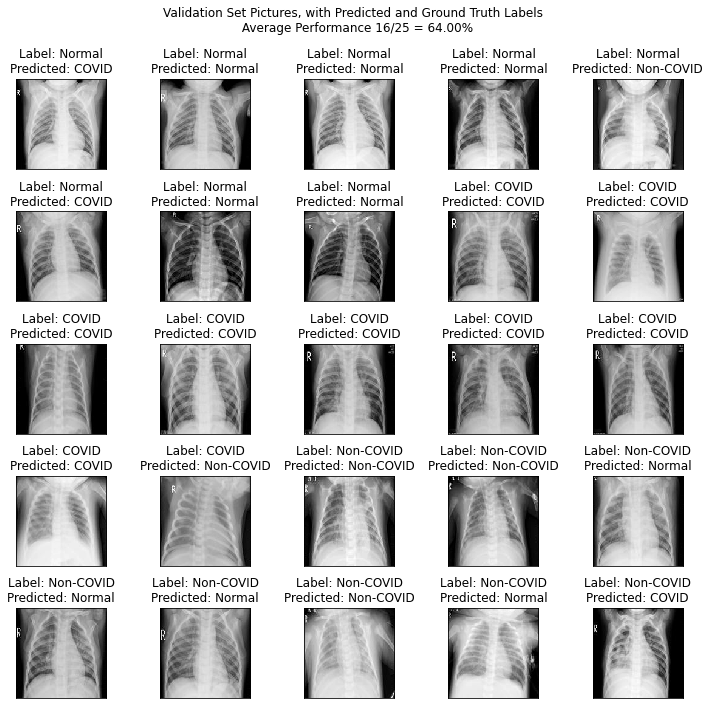

In [8]:
final_val_loader = DataLoader(final_val, batch_size=BATCH_SIZE_FL, shuffle=False)
final_test_loader = DataLoader(final_test, batch_size=BATCH_SIZE_FL, shuffle=False)
    
combined_model = model.load_combined('./saved_models/fl_model_augmentations.pth','./saved_models/sl_model_augmentations.pth' ,
                                     L_RATE_FL, DROPOUT_FL, WD_FL, L_RATE_SL, DROPOUT_SL, WD_SL)
pred = combined_model.predict_loader(device, final_val_loader)
actual = torch.empty(0, 3).to(device)
for _, labels in final_val_loader:
    labels = labels.to(device)
    actual = torch.cat((actual, labels), 0)
print("Validation Results")
print("Accuracy: {}".format(model.accuracy(pred, actual)))
print("Precision: {}".format(model.precision(pred, actual)))
print("Recall: {}".format(model.recall(pred, actual)))
print()
pred = combined_model.predict_loader(device, final_test_loader)
actual = torch.empty(0, 3).to(device)
for _, labels in final_test_loader:
    labels = labels.to(device)
    actual = torch.cat((actual, labels), 0)

print("Test Results")
print("Accuracy: {}".format(model.accuracy(pred, actual)))
print("Precision: {}".format(model.precision(pred, actual)))
print("Recall: {}".format(model.recall(pred, actual)))

print("\n\n")
print("Visualizing the Test Set: ")
utils.generate_performance_display(final_test_loader, pred, combined_labels)